## Môn: Phân tích xử lý ảnh
* Sinh viên: Huỳnh Thị Bảo Trân
* MSSV: 19110482
* Bài thực hành: Lab05

In [1]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from pylab import imread
from skimage.color import rgb2gray
import pywt
import pywt.data
from pywt import dwt2, idwt2
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

In [2]:
def ShowImage(ImageList, nRows = 1, nCols = 2, WidthSpace = 0.00, HeightSpace = 0.00):
    gs = gridspec.GridSpec(nRows, nCols)     
    gs.update(wspace = WidthSpace, hspace = HeightSpace)
    plt.figure(figsize = (20, 10))
    for i in range(len(ImageList)):
        ax1 = plt.subplot(gs[i])
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')

        plt.subplot(nRows, nCols,i+1)

        image = ImageList[i].copy()
        if (len(image.shape) < 3):
            plt.imshow(image, plt.cm.gray)
        else:
            plt.imshow(image)
        plt.title('Image ' + str(i))
        plt.axis('off')

    plt.show()

C:\Users\baotr\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


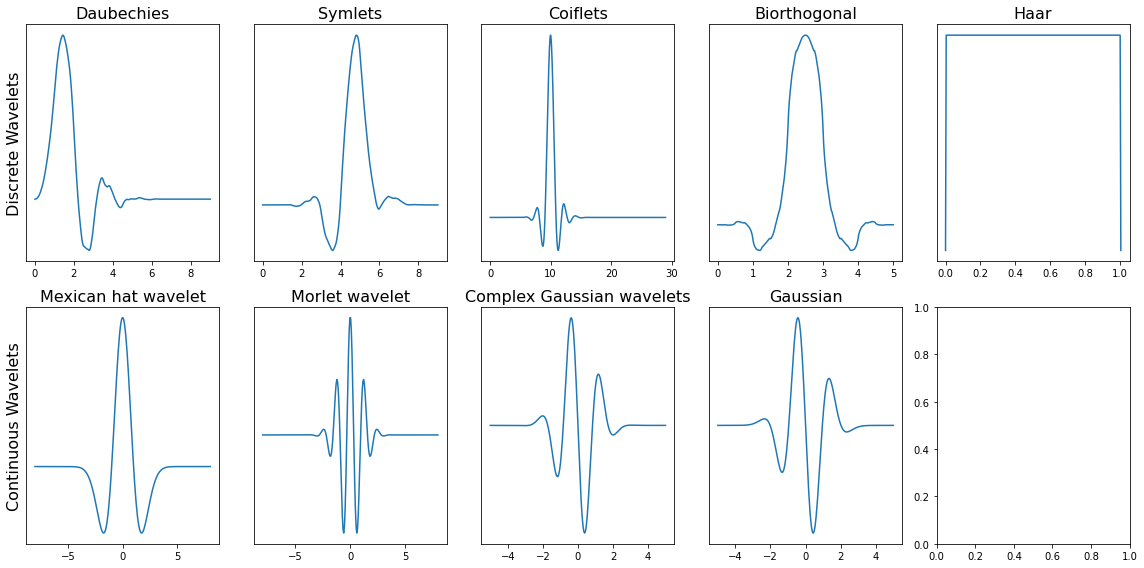

In [3]:
discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior1.3', 'haar']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']
 
list_list_wavelets = [discrete_wavelets, continuous_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]
 
fig, axarr = plt.subplots(nrows = 2, ncols = 5, figsize = (16, 8))
for ii, list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal = wavelet.orthogonal
        symmetry = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function, x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no, col_no].set_ylabel('Discrete Wavelets', fontsize = 16)
        if col_no == 0 and ii == 1:
            axarr[row_no, col_no].set_ylabel('Continuous Wavelets', fontsize = 16)
        axarr[row_no, col_no].set_title('{}'.format(family_name), fontsize = 16)
        axarr[row_no, col_no].plot(x_values, wavelet_function)
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])
 
plt.tight_layout()
plt.show()

1. Kiếm một ảnh trên internet và thực hiện tất cả các biến đổi wavelet 'db5', 'sym5', 'coif5', 'bior1.3', 'haar' ở mức 1 và 2 (two level decomposition)  

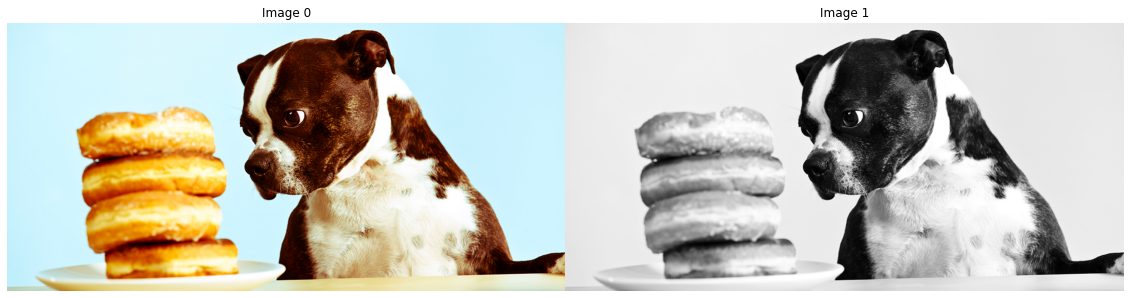

In [4]:
image_color = imread('animal.jpg')
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

ShowImage([image_color, image_gray], 1, 2)

db5


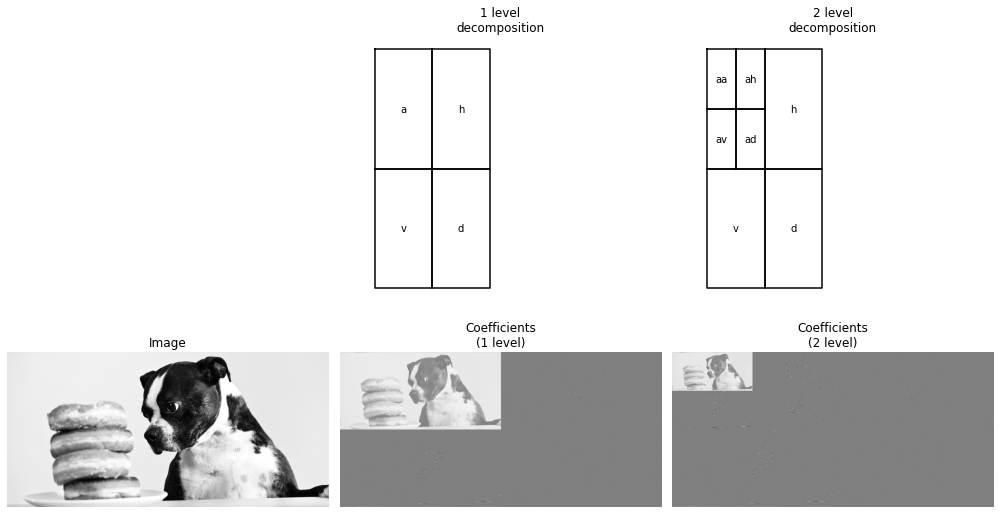

sym5


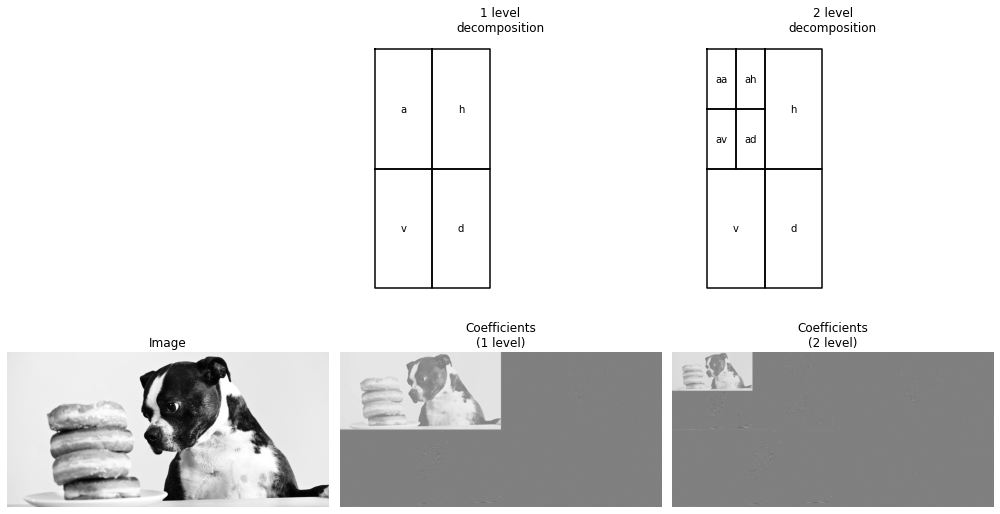

coif5


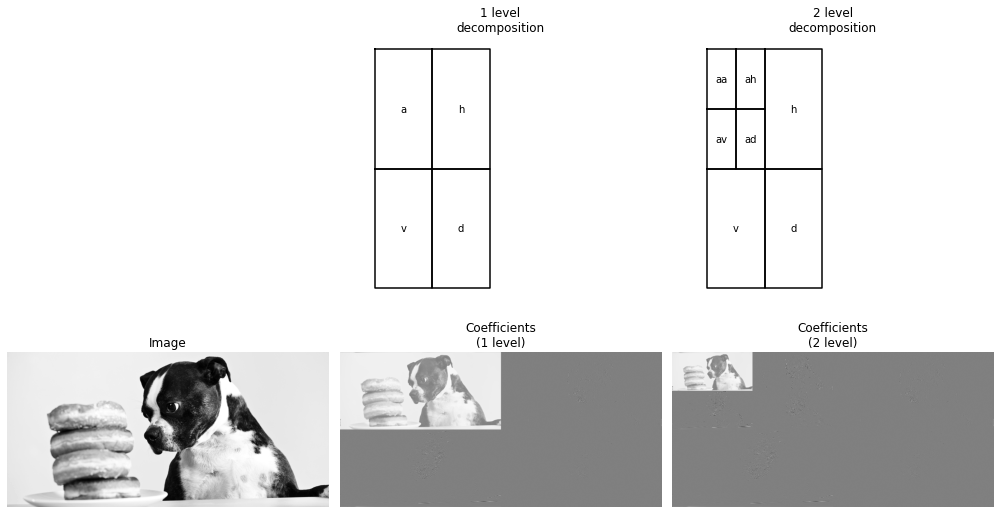

bior1.3


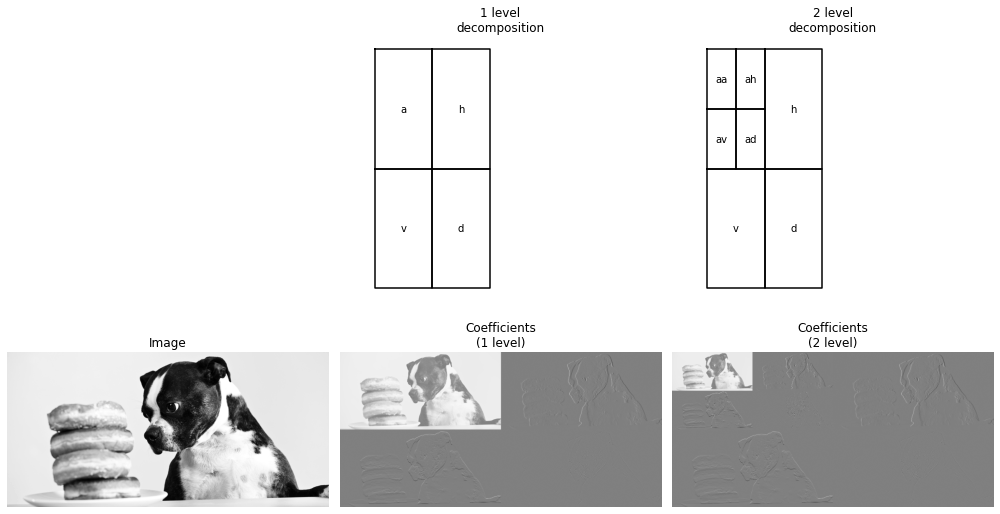

haar


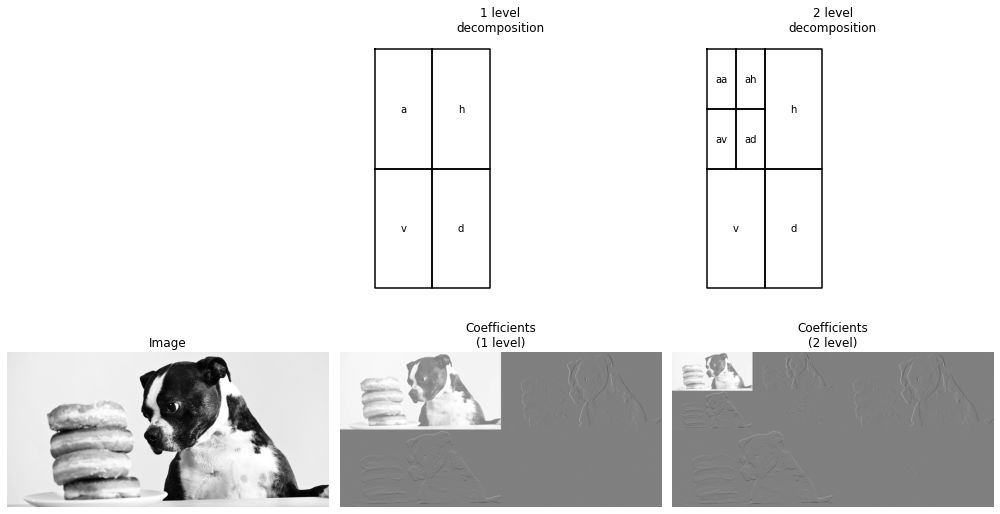

In [5]:
discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior1.3', 'haar']
for idx in range(len(discrete_wavelets)):
    print(str(discrete_wavelets[idx]))
    x = image_gray.astype(np.float32)
    shape = x.shape

    max_lev = 2
    label_levels = 2

    fig, axes = plt.subplots(2, 3, figsize = [14, 8])
    for level in range(0, max_lev + 1):
        if level == 0:
            axes[0, 0].set_axis_off()
            axes[1, 0].imshow(x, cmap = plt.cm.gray)
            axes[1, 0].set_title('Image')
            axes[1, 0].set_axis_off()
            continue

        draw_2d_wp_basis(shape, wavedec2_keys(level), ax = axes[0, level],
                         label_levels = label_levels)
        axes[0, level].set_title('{} level\ndecomposition'.format(level))

        c = pywt.wavedec2(x, discrete_wavelets[idx], mode = 'periodization', level = level)

        c[0] /= np.abs(c[0]).max()
        for detail_level in range(level):
            c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]

        arr, slices = pywt.coeffs_to_array(c)
        axes[1, level].imshow(arr, cmap = plt.cm.gray)
        axes[1, level].set_title('Coefficients\n({} level)'.format(level))
        axes[1, level].set_axis_off()

    plt.tight_layout()
    plt.show()

2. Viết một hàm trong đó truyền các tham số là hình ảnh cẩn biền đổi, function wavelet dùng ('db5', 'sym5', 'coif5', 'bior1.3', 'haar') và level biến đổi. Giá trị trả về là ảnh xấp xỉ và các ảnh detail. Kiểm tra kết quả với một bức ảnh kiếm từ internet

In [6]:
def approximation_detail(image, fun_wavelet):
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    coeffs2 = dwt2(image_gray, fun_wavelet)
    LL, (LH, HL, HH) = coeffs2

    ShowImage([LL, LH, HL, HH], 2, 2)

    titles = ['Approximation', ' Horizontal detail', 'Vertical detail', 'Diagonal detail']
    cmapList = [cm.gray, cm.jet, cm.rainbow, cm.viridis, cm.cubehelix, cm.RdBu]
    fig = plt.figure(figsize = (20, 10))
    for i, a in enumerate([LL, LH, HL, HH]):
        ax = fig.add_subplot(2, 2, i + 1)
        ax.imshow(a, interpolation = 'nearest', cmap = cmapList[3])
        ax.set_title(titles[i], fontsize = 10)
        ax.set_xticks([])
        ax.set_yticks([])

    fig.tight_layout()
    plt.show()

db5


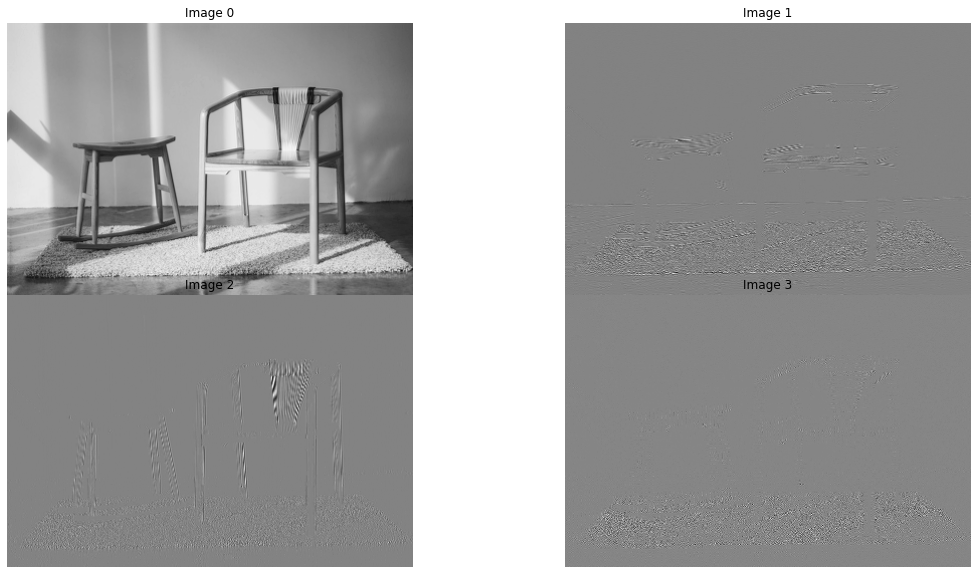

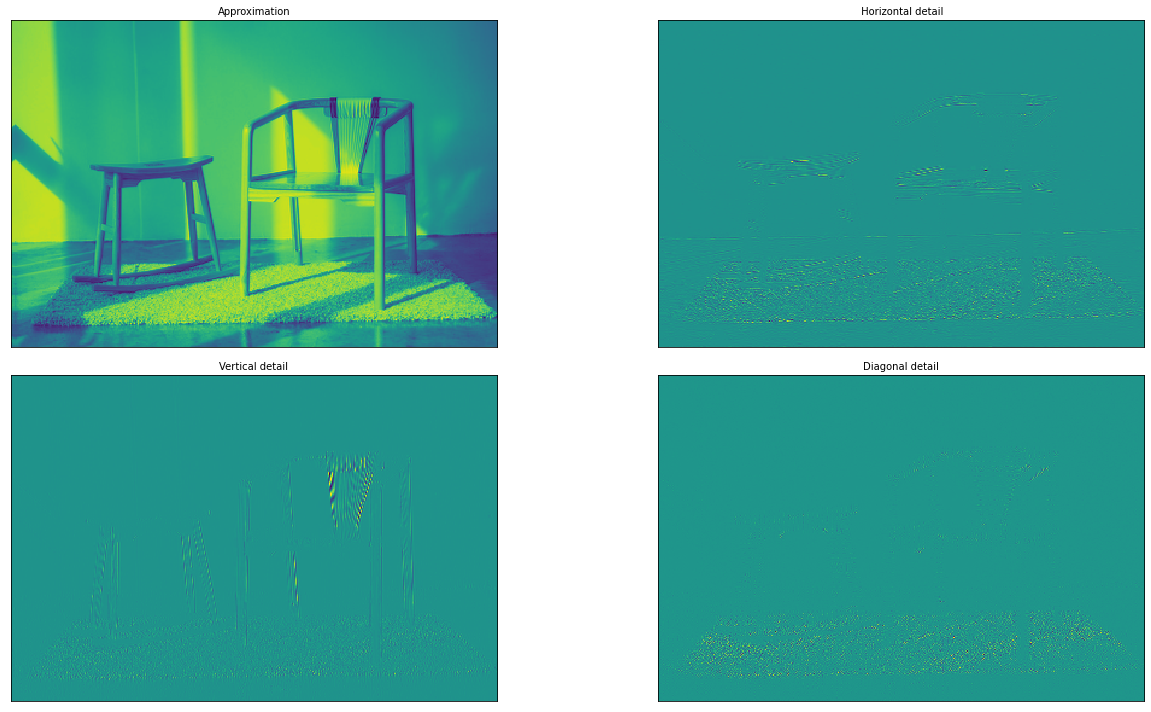

sym5


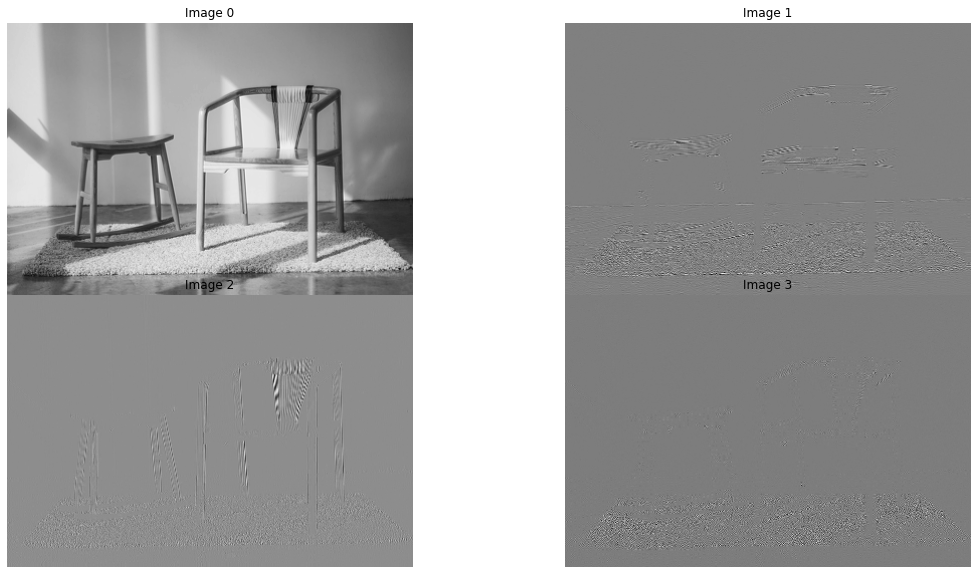

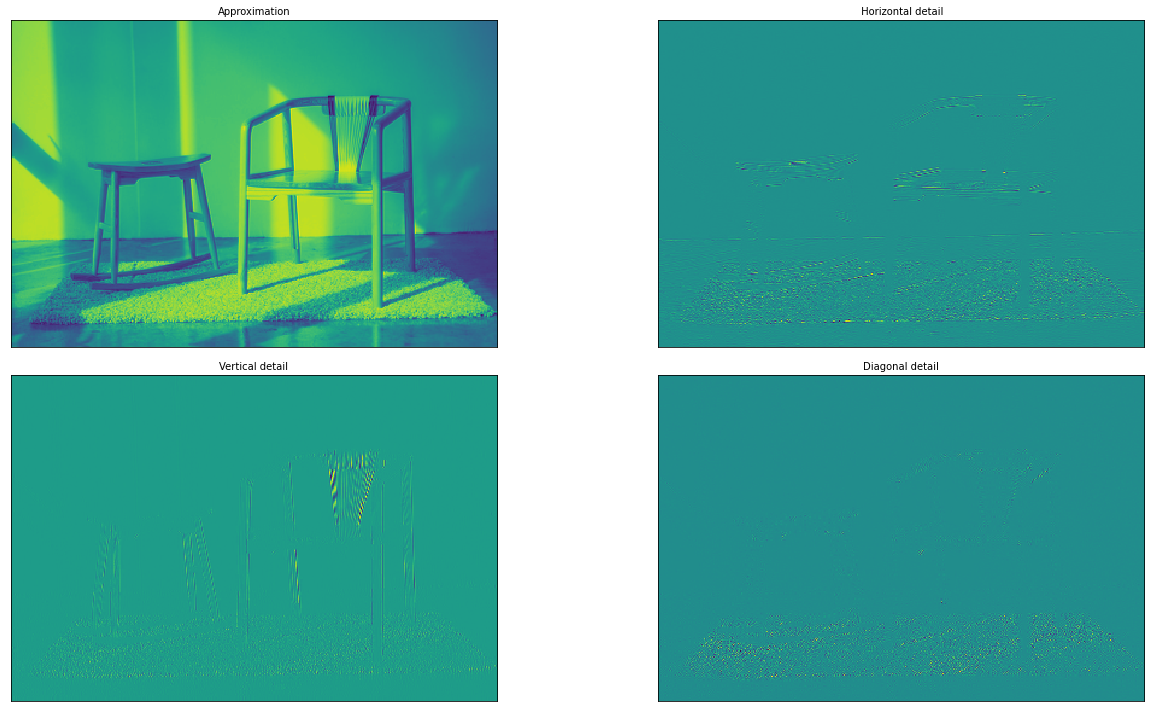

coif5


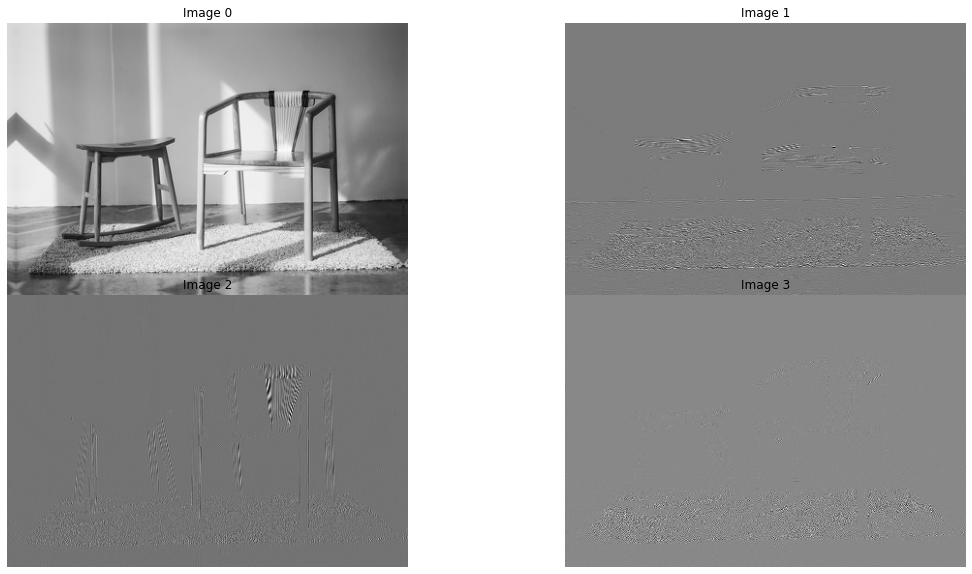

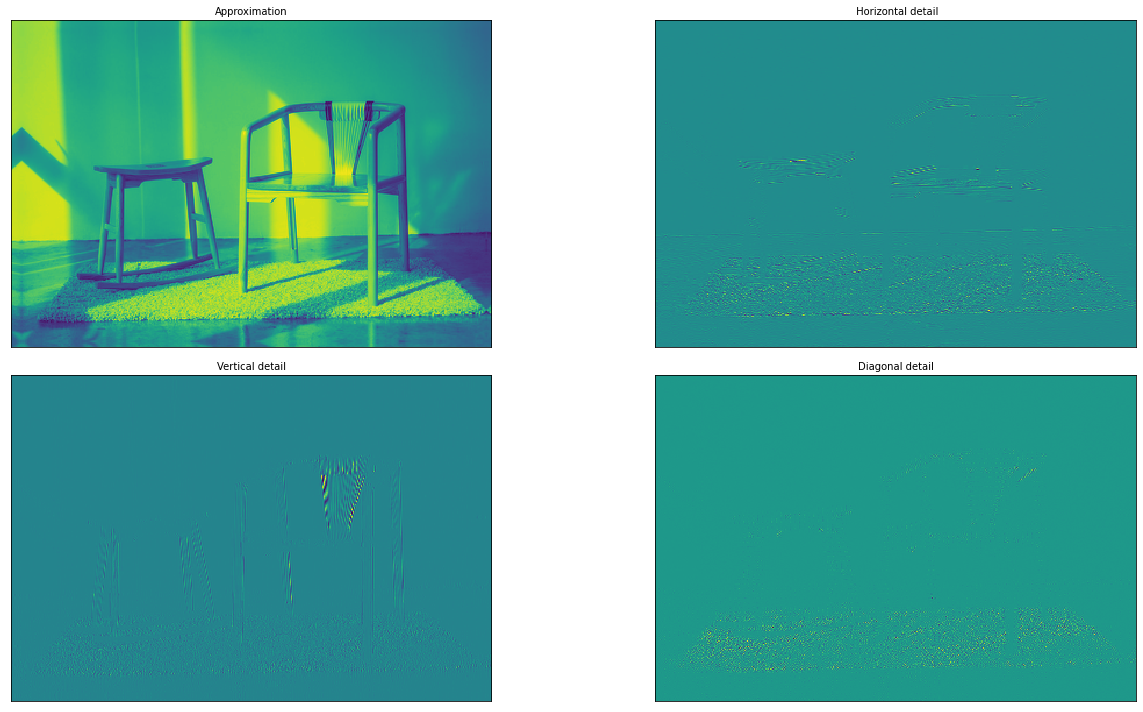

bior1.3


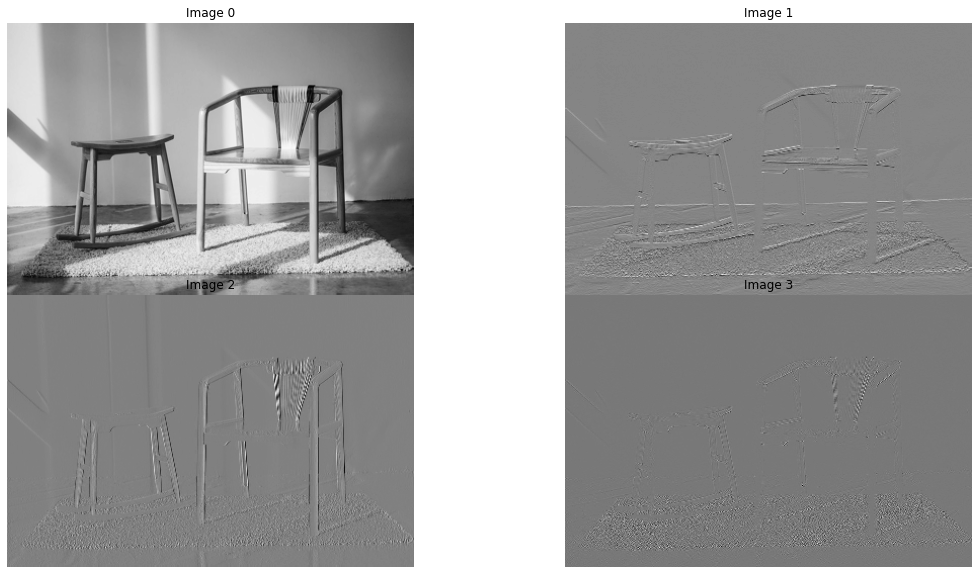

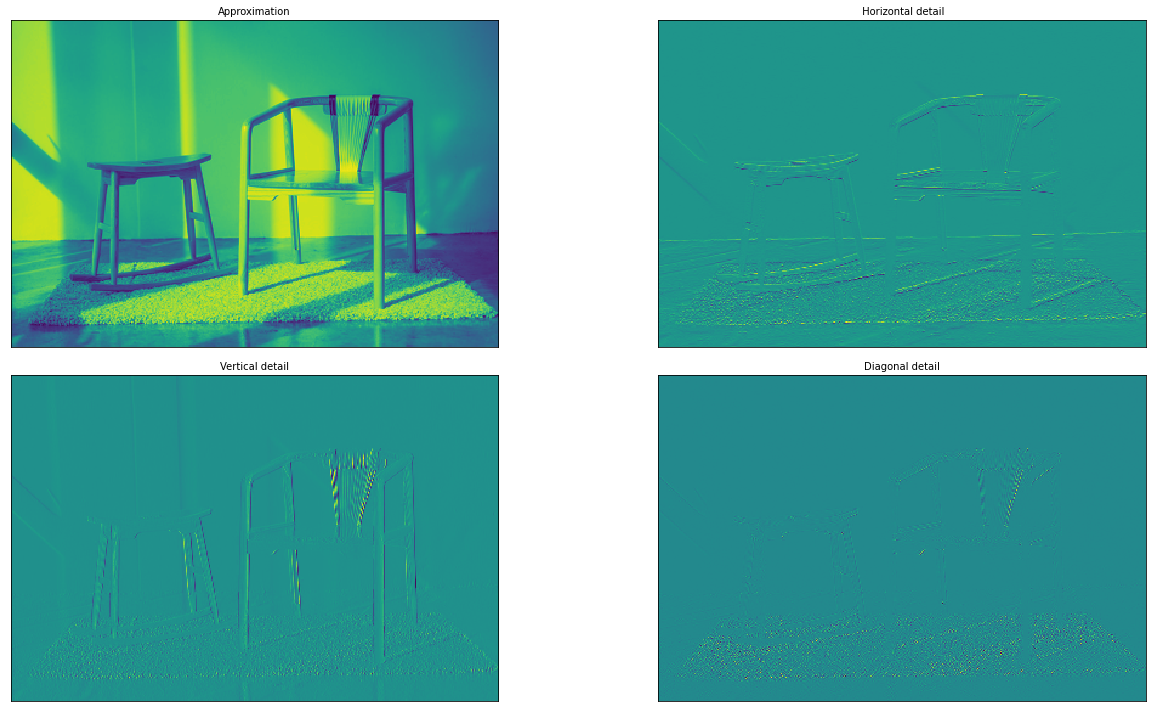

haar


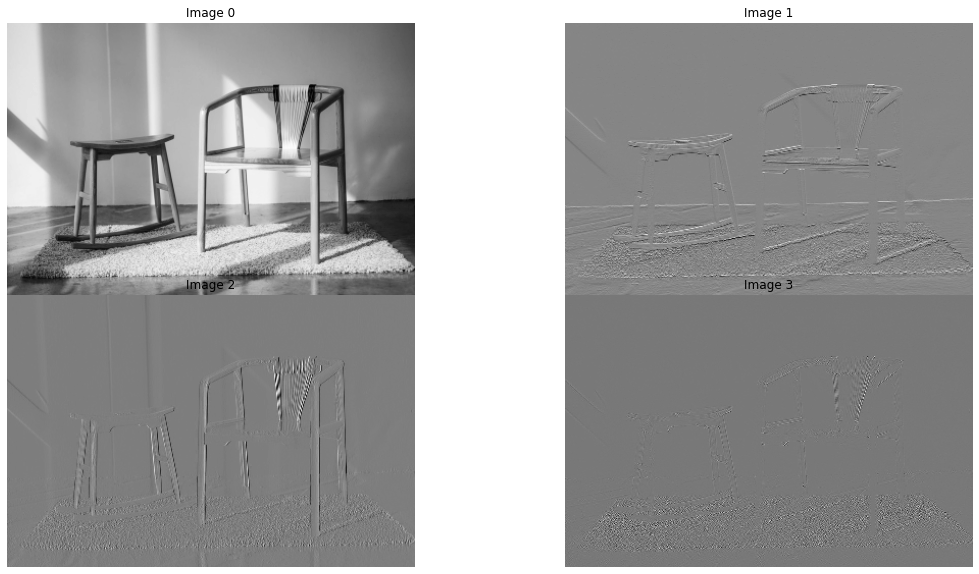

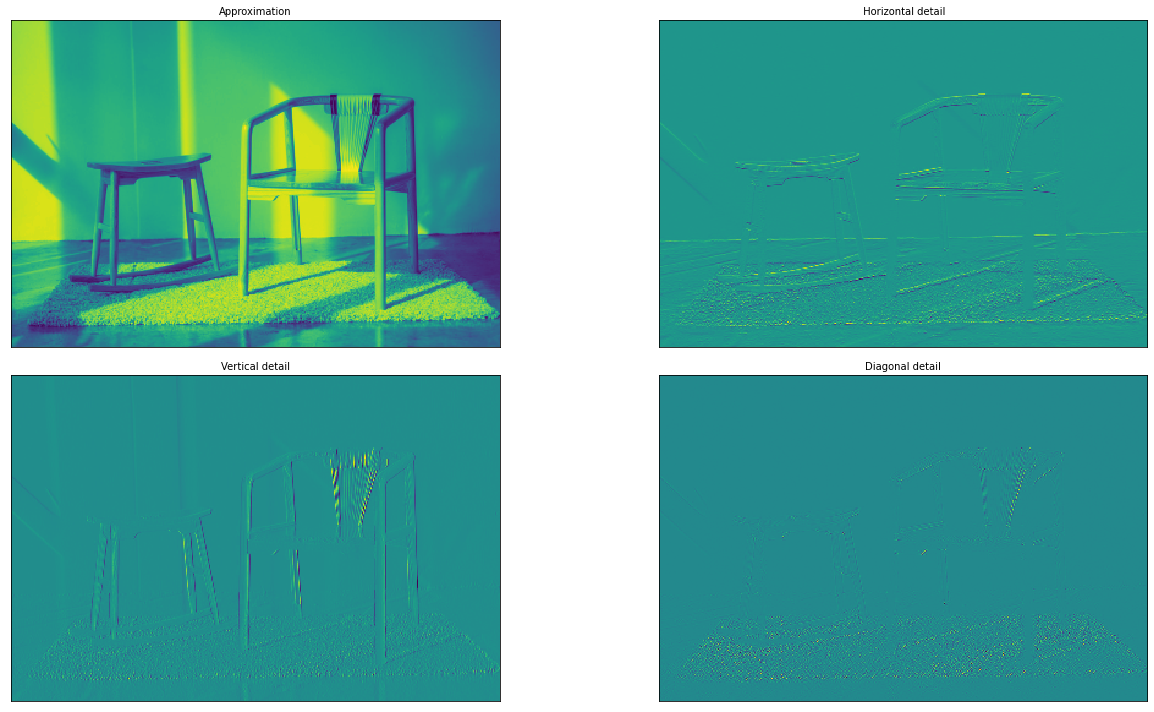

In [7]:
image = imread('chair.jpg')
fun_wavelet = ['db5', 'sym5', 'coif5', 'bior1.3', 'haar']
for idx in range(len(fun_wavelet)):
    print(fun_wavelet[idx])
    approximation_detail(image, fun_wavelet[idx])

3. Kiếm một ảnh từ internet. Thực hiện biến đổi wavelet để phân rã thành ảnh xấp xỉ và ảnh detail. Sau đó tiến hành các bước sau 
* Khôi phục ảnh gốc từ ảnh detail và ảnh approximation
* Xóa thông tin ảnh horizontal detail và khôi phục lại ảnh từ ảnh approximation và các ảnh detail còn lại
* Xóa thông tin ảnh vertical detail và khôi phục lại ảnh từ ảnh approximation và các ảnh detail còn lại
* Xóa thông tin ảnh diagonal detail và khôi phục lại ảnh từ ảnh approximation và các ảnh detail còn lại

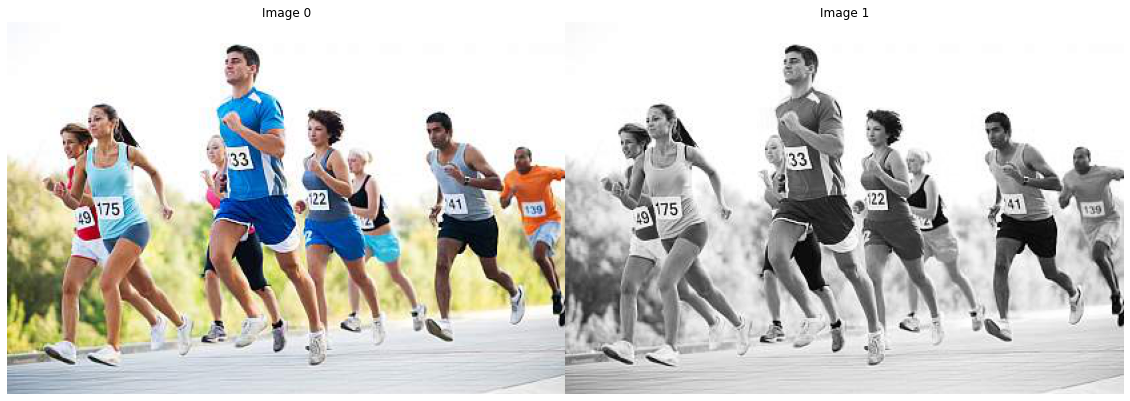

In [8]:
image_color = imread('marathon.jpg')
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

ShowImage([image_color, image_gray], 1, 2)

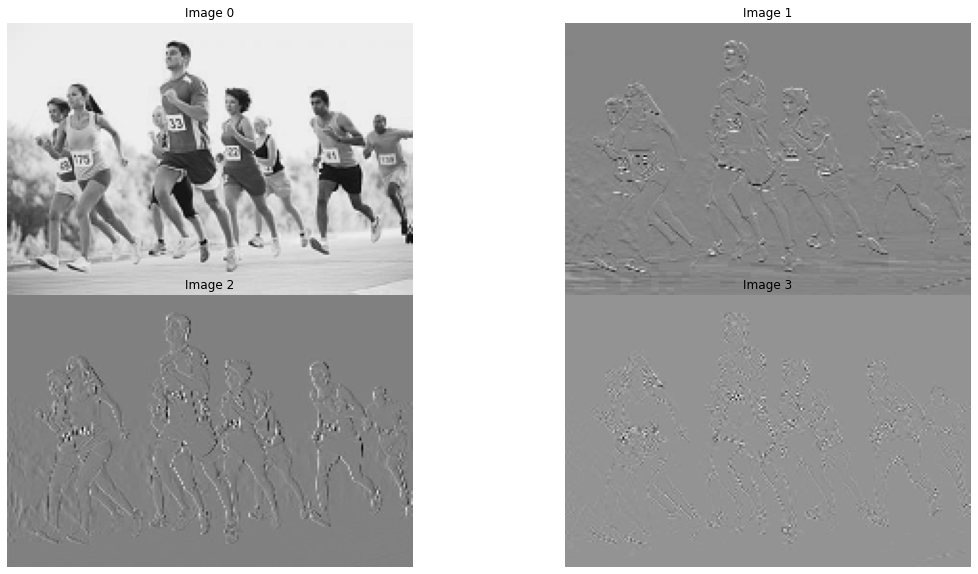

In [9]:
coeffs2 = dwt2(image_gray, discrete_wavelets[3])
LL, (LH, HL, HH) = coeffs2

ShowImage([LL, LH, HL, HH], 2, 2)

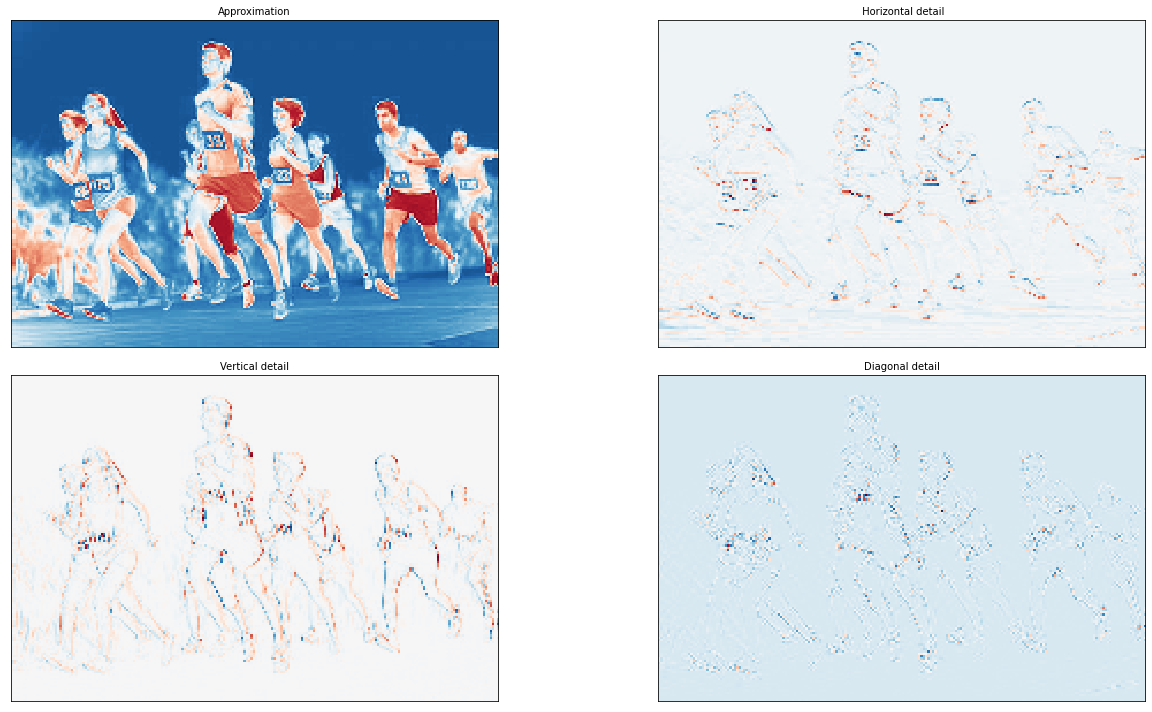

In [10]:
titles = ['Approximation', ' Horizontal detail', 'Vertical detail', 'Diagonal detail']
cmapList = [cm.gray, cm.jet, cm.rainbow, cm.viridis, cm.cubehelix, cm.RdBu]
fig = plt.figure(figsize = (20, 10))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.imshow(a, interpolation = 'nearest', cmap = cmapList[5])
    ax.set_title(titles[i], fontsize = 10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

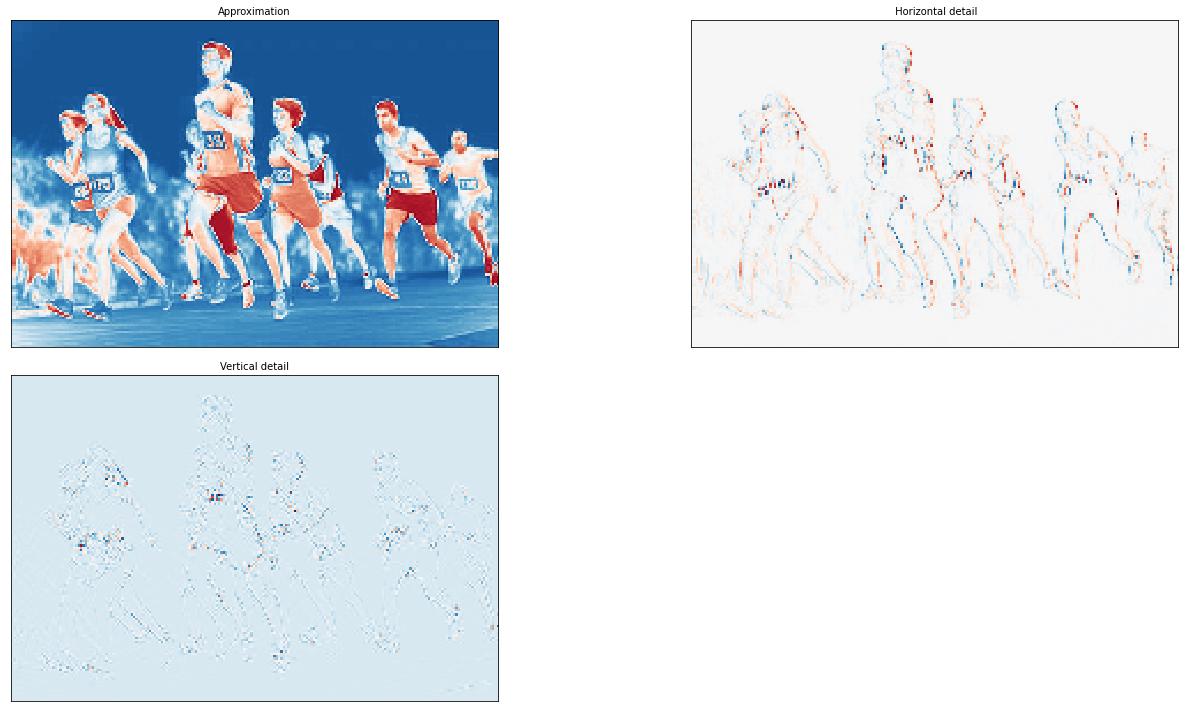

In [11]:
fig = plt.figure(figsize = (20, 10))
for i, a in enumerate([LL, HL, HH]):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.imshow(a, interpolation = 'nearest', cmap = cmapList[5])
    ax.set_title(titles[i], fontsize = 10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

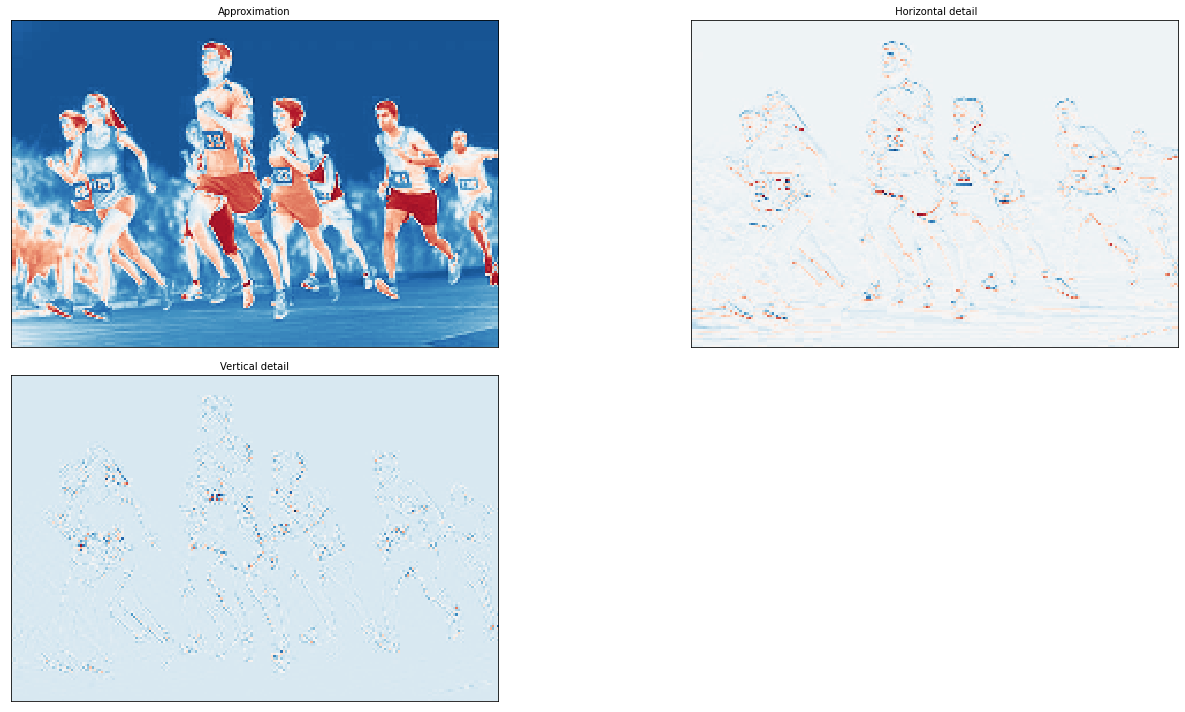

In [12]:
fig = plt.figure(figsize = (20, 10))
for i, a in enumerate([LL, LH, HH]):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.imshow(a, interpolation = 'nearest', cmap = cmapList[5])
    ax.set_title(titles[i], fontsize = 10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

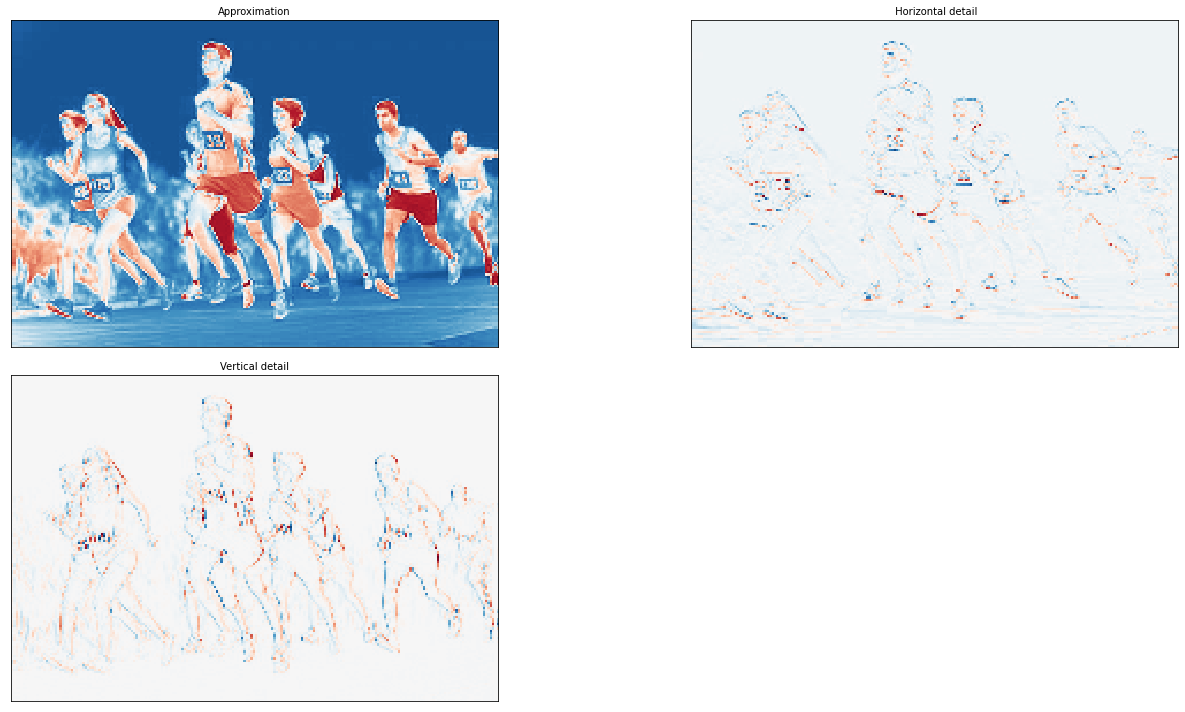

In [13]:
fig = plt.figure(figsize = (20, 10))
for i, a in enumerate([LL, LH, HL]):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.imshow(a, interpolation = 'nearest', cmap = cmapList[5])
    ax.set_title(titles[i], fontsize = 10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()